In [42]:
#criando 30 valores de x aleatórios 
x = range(0, 1, length = 30)
#definindo os valores dos coeficientes
a1, a2, a3, a4, a5, a6 = 6.0, 5.0, 4.0, 3.0, 2.0, 1.0
#calculando os valores de y para o polinomio criado
y = a1*x .+ a2*x.^2 .+ a3*x.^3 .+ a4*x.^4 .+ a5*x.^5 .+ a6


30-element Vector{Float64}:
  1.0
  1.2130102024026055
  1.438957368989909
  1.678992873583045
  1.934393290205244
  2.2065720940352977
  2.4970913623610262
  2.807673475532746
  3.1402128179167335
  3.496787478848698
  3.8796709535872425
  4.291343844267329
  4.7345055608537585
  ⋮
  8.23642658926616
  8.996430624144946
  9.818799960938318
 10.70872982298554
 11.671751250990376
 12.713742803974561
 13.840942260231252
 15.059958318278511
 16.377782297812768
 17.80179984066227
 19.33980261174057
 21.0

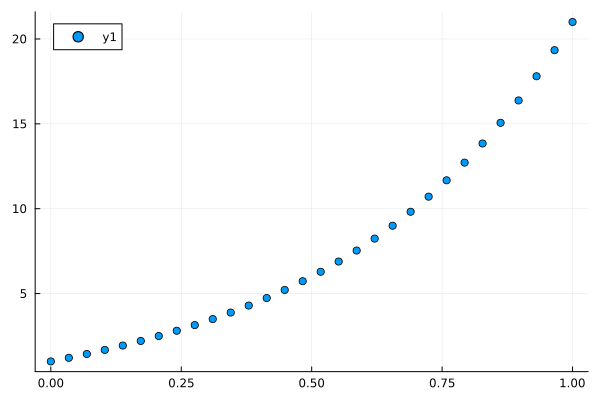

In [43]:
#plotando pontos criados 
using Plots
scatter(x, y)

In [44]:
#regressao com grau 0
A0 = ones(30, 1)
C0 = A0 \ y

r0 = A0*C0 .- y #calculando residuo
SQR0 = sum(r0 .^2) #calculando soma ao quadrados dos residuos

1001.1157762708535

In [45]:
#regressao com grau 1
A1 = hcat(A0, x)
C1 = A1 \ y

r1 = A1*C1 .- y #calculando residuo
SQR1 = sum(r1 .^ 2) #calculando soma ao quadrados dos residuos

77.8049215602568

In [46]:
#regressao com grau 2
A2 = hcat(A1, x)
C2 = A2 \ y

r2 = A2*C2 .- y #calculando residuo
SQR2 = sum(r2 .^ 2) #calculando soma ao quadrados dos residuos

77.80492156025677

In [47]:
#regressao com grau 3
A3 = hcat(A2, x.^3)
C3 = A3 \ y

r3 = A3*C3.- y
SQR3= sum(r3.^ 2)

0.12608849949226428

In [48]:
#regressao com grau 4
A4 = hcat(A3, x.^4)
C4 = A4 \ y

r4 = A4*C4 .- y
SQR4 = sum(r4.^2)

0.021531377444079212

In [55]:
#regressao com grau 5
A5 = hcat(A4, x.^5)
C5 = A5 \ y

r5 = A5*C5 .- y
SQR5 = sum(r5.^2)

0.001843356866733639

In [56]:
#regressao com grau 29
A29 = A4
for i in 4:29
    A29 = hcat(A29, x.^i)
end
C29 = A29 \ y

r29 = A29*C29 .- y
SQR29 = sum(r29.^2)

3.69585696589662e-10

In [50]:
# regressao com grau 30
A30 = hcat(A29, x.^30)
C30 = A30 \ y

r30 = A30*C30 .- y
SQR30 = sum(r30.^2)

8.013523600230169e-11

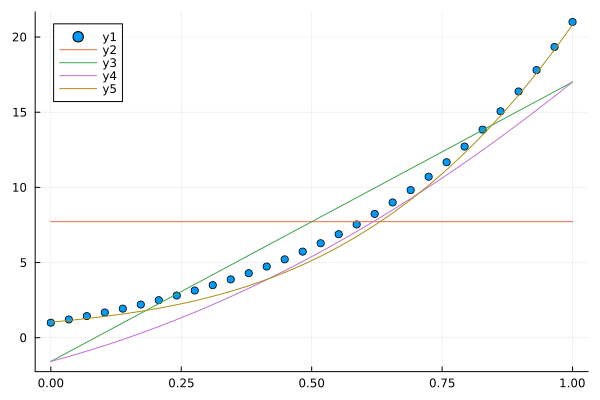

In [51]:
plot!(x, C0[1] .* ones(length(x)))
plot!(x, C1[1] .+ C1[2].*x)
plot!(x, C2[1] .+ C2[2].*x .+ C2[3].*x.^2)
plot!(x, C3[1] .+ C3[2].*x .+ C3[3].*x.^2 .+ C3[4].*x.^3)

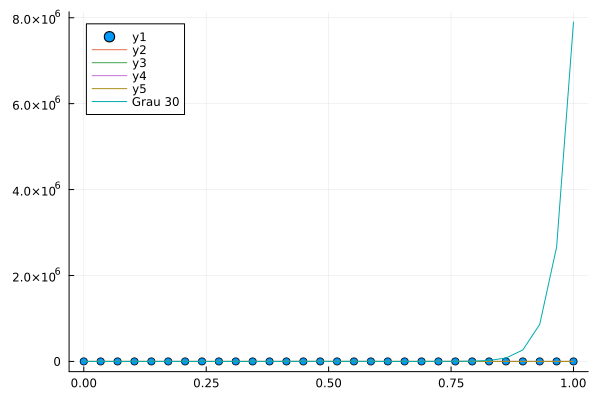

In [52]:
x_array = collect(x)

# Inicializar o polinômio de grau 30
C30plot = C30[1] .+ C30[2] .* x_array
for i in 3:31  
    C30plot .+= C30[i] .* x_array.^(i-1)
end

# Plotar o polinômio de grau 30
plot!(x_array, C30plot, label="Grau 30")

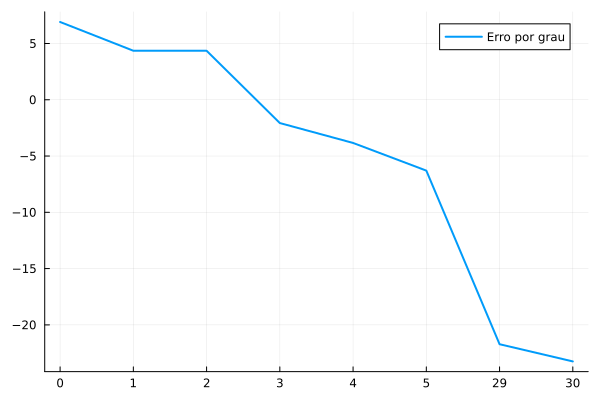

In [58]:
erro = [SQR0, SQR1, SQR2, SQR3, SQR4, SQR5, SQR29, SQR30]
eixoX = ["0", "1", "2", "3", "4", "5", "29", "30"]
plot(eixoX, log.(erro), label="Erro por grau", lw=2)


In [54]:
plot(eixoX, erro, yaxis=:log10, label="Erro", lw=2)

LoadError: UndefVarError: `eixoX` not defined